In [6]:
from core import *
import os , random

# this cell get a rondom file from the data folder
directory = '/home/mmed/Documents/projects/bill_reader/data'
bill = random.choice(os.listdir(directory))
# bill = "roxanne-596018.pdf"
file =os.path.join(directory, bill)
fig_size = [6.4, 4.8]
print(bill)

dennys-20190420_013.pdf


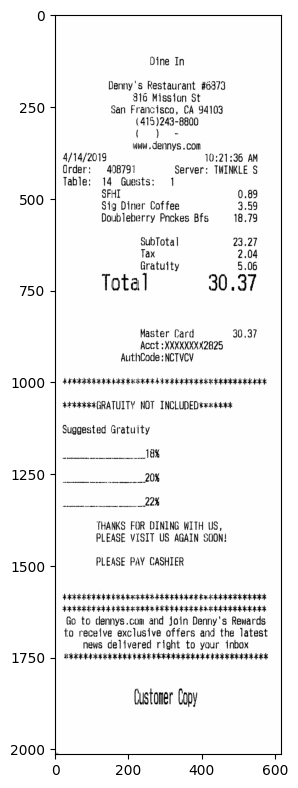

In [7]:

plt.rcParams["figure.figsize"] = [2 * x for x in fig_size]
image = get_final_image(file)
plt.imshow(image)
plt.show()

In [8]:
# first we use tesseract to get each word location 
results = ts.image_to_data(image, 
output_type=Output.DICT)
df = pd.DataFrame(data= results)
df = df[df.text != '']
# clean_the_text is a fuction that deletes every unreadable character
df = df.apply(clean_the_text,axis= 1)
# get_lines is a function that gets every line in the receipt that contains a price and put them in a dictionary
product_lines = get_lines(df)
# using del_suffix we delete everything after the price in each line 
del_suffix(product_lines)
# process_additional_data seperates the list of products and other relevant information like the total and tax and extract them
# the keys of additional_data are total, state(log errors while parsing), tax, subtotal and limit that is used to extract the list of products
additional_data = process_additional_data(product_lines)
# here we delete every line that is after the limit
to_del = []
for line in product_lines:
    if line >= additional_data['limit']:
        to_del.append(line)
for line in to_del:
    product_lines.pop(line)
# sometimes lines with no relevant information have prices so we use isolte_products to delete them
isolate_products(product_lines)
# with this we will check every product line format and choose the most recerrent for our final dataframe
formats = []
for line in product_lines:
    formats.append(get_format(product_lines[line]))
chosen_format = most_frequent(formats)
product_list = pd.DataFrame(columns=chosen_format)
for line in product_lines:
    if follow_format(product_lines[line],chosen_format):
        product_list.loc[len(product_list.index)] = get_data(product_lines[line],chosen_format)
# and now we have product list our dataframe that contains the product list 
# we add the date and the name to the additional_data dictionary
additional_data['date'] = find_date(df)
additional_data['name'] = find_name(image)
product_list

,desc,price
0,SFHI,0.89
1,Sig Diner Coffee,3.59
2,Doutileberry Pnckes Bfs,18.79


In [9]:
additional_data

{'state': '',
 'subtotal': 23.21,
 'costs': 7.16,
 'total': 30.37,
 'limit': 609,
 'date': '4/14/2019',
 'name': 'Dine In'}

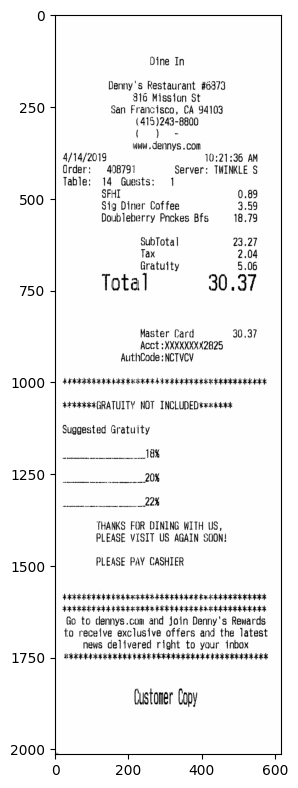

In [10]:
plt.imshow(image)
plt.show()

In [8]:
from datetime import datetime


date = datetime.strptime( '4/13/2019' , '%d/%m/%Y')
print(date.strftime("%Y-%m-%d"))

ValueError: time data '4/13/2019' does not match format '%d/%m/%Y'